
# Exploratory Data Analysis I

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Off all the passengers, how many survived and how many died?](#section401)<br/>
    - 4.2 [Who is more likely to survive, Male or Female?](#section402)<br/>
    - 4.3 [What is the rate of survival of males, females and child on the basis of Passenger Class?](#section403)<br/>
    - 4.4 [What is the survival rate considering the Embarked variable?](#section404)<br/>
    - 4.5 [Survival rate - Comparing Embarked and Sex.](#section405)<br/>
    - 4.6 [How survival rate vary with Embarked, Sex and Pclass](#section406)<br/>
    - 4.7 [Segment age in bins with size 10.](#section407)<br/>
    - 4.8 [Analysing SibSp and Parch variable.](#section408)<br/>
    - 4.9 [Segment fare in bins of size 12.](#section409)<br/>
    - 4.10 [Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'](#section410)<br/>
    - 4.11 [Establish coorelation between all the features using heatmap.](#section411)<br/>
    - 4.12 [Hypothesis: Women and children are more likely to survive](#section412)<br/>
5. [Conclusions](#section5)<br/>  

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes __cleaning__, __munging__, __combining__, __reshaping__, __slicing__, __dicing__, and __transforming data__ for analysis purpose.
it involves collecting, aggregating, cleaning, and organizing the data to be consumed by the algorithms designed to make discoveries or to create models.

* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
    - Finding patterns in Data
    - Determining relationships in Data
    - Checking of assumptions
    - Preliminary selection of appropriate models
    - Detection of mistakes


<a id=section2></a>

### 2. Data Loading and Description
![image.png](attachment:image.png)

<a id=section201></a>

- The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc.
- The dataset comprises of __891 observations of 12 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :|
| PassengerId   | Passenger Identity                                        |
| Survived      | Whether passenger survived or not                         |  
| Pclass        | Class of ticket                                           |
| Name          | Name of passenger                                         |   
| Sex           | Sex of passenger                                          |
| Age           | Age of passenger                                          |
| SibSp         | Number of sibling and/or spouse travelling with passenger |
| Parch         | Number of parent and/or children travelling with passenger|
| Ticket        | Ticket number                                             |
| Fare          | Price of ticket                                           |
| Cabin         | Cabin number                                              |

#### Some Background Information
The sinking of the RMS Titanic in the early morning of __15 April 1912, four days into the ship's maiden voyage__ from __Southampton to New York City__, was one of the deadliest peacetime maritime disasters in history, __killing more
than 1,500 people__. The largest passenger liner in service at the time, Titanic had an __estimated 2,224 people on
board__ when she struck an __iceberg in the North Atlantic__. The ship had received __six warnings__ of sea ice but
was travelling at near __maximum speed when the lookouts sighted the iceberg__. Unable to turn quickly enough, the
ship suffered a glancing blow that buckled the starboard (right) side and opened __five of sixteen compartments to
the sea__. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the __unequal treatment__ of the three passenger classes during the evacuation. Inquiries recommended sweeping changes to maritime regulations, leading to the __International Convention for the Safety of Life at Sea (1914)__, which continues to govern maritime safety.

In [241]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


#### Importing packages                                          

In [242]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output ###Assignment



#### Importing the Dataset

In [243]:
titanic_data = pd.read_csv("https://raw.githubusercontent.com/amity1415/DS/main/EKeeda/titanicRawData.csv")



In [244]:
type(titanic_data)

pandas.core.frame.DataFrame

In [245]:
df1 = titanic_data.groupby('Ticket')['Survived'].nunique()
display(df1)

Ticket
110152         1
110413         2
110465         1
110564         1
110813         1
              ..
W./C. 6608     1
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Name: Survived, Length: 681, dtype: int64

In [246]:
df1.count()

np.int64(681)

In [247]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [248]:
type(titanic_data)

pandas.core.frame.DataFrame

In [249]:
titanic_data.info() ## It helps provide the sturcture of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [250]:
type(titanic_data['Name'][0])

str

In [251]:
i = titanic_data.Name[1]
type(i)

str

<a id=section3></a>

## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns.
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>

In [252]:
#Generate Pandas Pre profiling report
#Perform Data Preprocessing based on Issues shown by the Pre Profiling reprot
# Generate Pandas Profiling report --> Post Profiling report--> Verify, If my data is fine for processing(analysis.)

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end


In [253]:
titanic_data.shape ## This will print the number of rows and columns of the Data Frame

(891, 12)

titanic_data has __891 rows__ and __12 columns.__

In [254]:
titanic_data.columns # THis will print the names of all columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [255]:
 titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<a id=section301></a>

In [256]:
 titanic_data.tail() # This will print the last n rows of the Data Frame

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [257]:
titanic_data.isnull().sum() # Finding the count of null values in the data set.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above output we can see that __Age__ and __Cabin__ columns contains __maximum null values__. We will see how to deal with them.

<a id=section302></a>

### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot.
- _Grannular level_ analysis of each column.

In [258]:
 profile = pandas_profiling.ProfileReport(titanic_data)

In [259]:
 profile.to_file(output_file="titanic_before_processing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 42.18it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __titanic_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>

In [260]:
for name in titanic_data.Name:
    print(name)

Braund, Mr. Owen Harris
Cumings, Mrs. John Bradley (Florence Briggs Thayer)
Heikkinen, Miss. Laina
Futrelle, Mrs. Jacques Heath (Lily May Peel)
Allen, Mr. William Henry
Moran, Mr. James
McCarthy, Mr. Timothy J
Palsson, Master. Gosta Leonard
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Nasser, Mrs. Nicholas (Adele Achem)
Sandstrom, Miss. Marguerite Rut
Bonnell, Miss. Elizabeth
Saundercock, Mr. William Henry
Andersson, Mr. Anders Johan
Vestrom, Miss. Hulda Amanda Adolfina
Hewlett, Mrs. (Mary D Kingcome) 
Rice, Master. Eugene
Williams, Mr. Charles Eugene
Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
Masselmani, Mrs. Fatima
Fynney, Mr. Joseph J
Beesley, Mr. Lawrence
McGowan, Miss. Anna "Annie"
Sloper, Mr. William Thompson
Palsson, Miss. Torborg Danira
Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
Emir, Mr. Farred Chehab
Fortune, Mr. Charles Alexander
O'Dwyer, Miss. Ellen "Nellie"
Todoroff, Mr. Lalio
Uruchurtu, Don. Manuel E
Spencer, Mrs. William Augustus (Marie E

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - Dropping/Replacing missing entries of __Embarked.__
    - Replacing missing values of __Age__ with median values.
    - Dropping the column __'Cabin'__ as it has too many _null_ values.
    - Replacing 0 values of fare with median values.

In [261]:
titanic_data['Embarked'].value_counts() #Value Counts

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [262]:
titanic_data['Embarked'].isnull()# Finding out the details of the the passanger whose Embarked Data is null

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [263]:
titanic_data[titanic_data['Embarked'].isnull()] # Finding out the details of the the passanger whose Embarked Data is null

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [264]:
titanic_data[titanic_data['Ticket'] == '113572']

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [265]:
titanic_data[titanic_data['Cabin'] == 'B28']

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

In [266]:
#Create a column that will give an representation of Ticket Price Per passenger.

In [267]:
titanic_data['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [268]:
titanic_data[titanic_data['Ticket']=='347082']

PassengerId  Survived  Pclass  \
13            14         0       3   
119          120         0       3   
541          542         0       3   
542          543         0       3   
610          611         0       3   
813          814         0       3   
850          851         0       3   

                                                  Name     Sex   Age  SibSp  \
13                         Andersson, Mr. Anders Johan    male  39.0      1   
119                  Andersson, Miss. Ellis Anna Maria  female   2.0      4   
541               Andersson, Miss. Ingeborg Constanzia  female   9.0      4   
542                  Andersson, Miss. Sigrid Elisabeth  female  11.0      4   
610  Andersson, Mrs. Anders Johan (Alfrida Konstant...  female  39.0      1   
813                 Andersson, Miss. Ebba Iris Alfrida  female   6.0      4   
850            Andersson, Master. Sigvard Harald Elias    male   4.0      4   

     Parch  Ticket    Fare Cabin Embarked  
13       5  347082  31.275   NaN        S  
119      2  347082  31.275   NaN        S  
541      2  347082  31.275   NaN        S  
542      2  347082  31.275   NaN        S  
610      5  347082  31.275   NaN        S  
813      2  347082  31.275   NaN        S  
850      2  347082  31.275   NaN        S

In [269]:
titanic_data[titanic_data['Pclass']==3]['Fare'].mean()

np.float64(13.675550101832993)

In [270]:
titanic_data[(titanic_data['Pclass']==3) & (titanic_data['SibSp']==0) & (titanic_data['Parch']==0)]['Fare'].mean()

np.float64(9.272051851851852)

In [271]:
titanic_data.groupby('Ticket').agg({'Ticket':'count','Fare':'mean'})

Ticket    Fare
Ticket                     
110152            3  86.500
110413            3  79.650
110465            2  52.000
110564            1  26.550
110813            1  75.250
...             ...     ...
W./C. 6608        4  34.375
W./C. 6609        1   7.550
W.E.P. 5734       1  61.175
W/C 14208         1  10.500
WE/P 5735         2  71.000

[681 rows x 2 columns]

In [272]:
titanic_data['Ticket_Pass_Count']= titanic_data.groupby('Ticket')['Ticket'].transform('count')

In [273]:
#titanic_data.drop('Ticket_Count', axis=1,inplace=True)

In [274]:
#Looking at a 3rd class Fare where #passenger on a single ticket is 1 (sibsp and parch=0)
titanic_data['FarePerPass']= titanic_data['Fare']/(titanic_data['Ticket_Pass_Count'])

In [275]:
titanic_data.head(20)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   

    Parch            Ticket     Fare Cabin Embarked  Ticket_Pass_Count  \
0       0         A/5 21171   7.2500   NaN        S                  1   
1       0          PC 17599  71.2833   C85        C                  1   
2       0  STON/O2. 3101282   7.9250   NaN        S                  1   
3       0            113803  53.1000  C123        S                  2   
4       0            373450   8.0500   NaN        S                  1   
5       0            330877   8.4583   NaN        Q                  1   
6       0             17463  51.8625   E46        S                  1   
7       1            349909  21.0750   NaN        S                  4   
8       2            347742  11.1333   NaN        S                  3   
9       0            237736  30.0708   NaN        C                  2   
10      1           PP 9549  16.7000    G6        S                  2   
11      0            113783  26.5500  C103        S                  1   
12      0         A/5. 2151   8.0500   NaN        S                  1   
13      5            347082  31.2750   NaN        S                  7   
14      0            350406   7.8542   NaN        S                  1   
15      0            248706  16.0000   NaN        S                  1   
16      1            382652  29.1250   NaN        Q                  5   
17      0            244373  13.0000   NaN        S                  1   
18      0            345763  18.0000   NaN        S                  1   
19      0              2649   7.2250   NaN        C                  1   

    FarePerPass  
0      7.25000

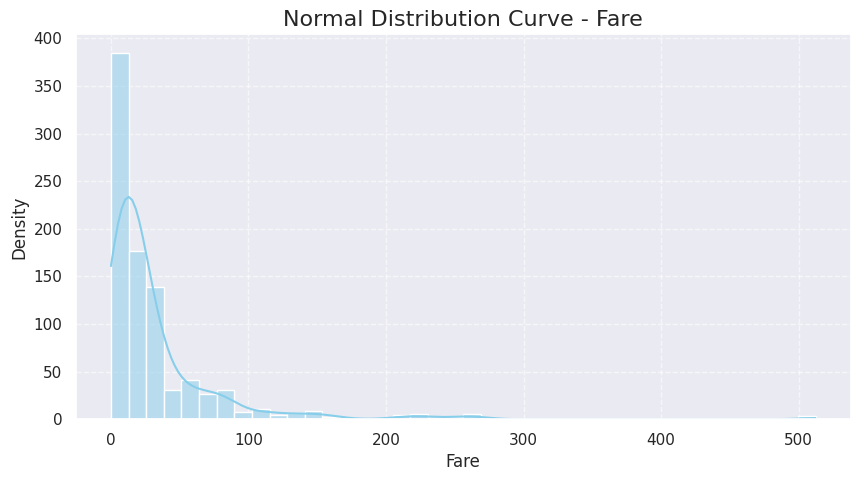

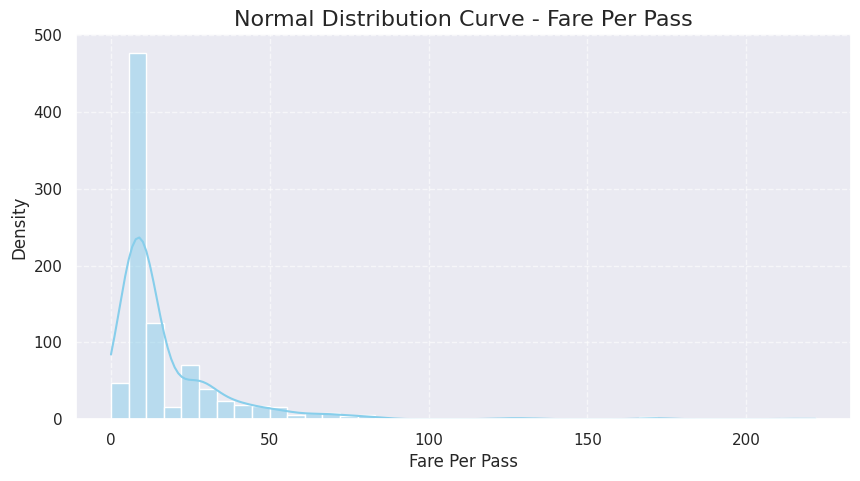

In [276]:
plt.figure(figsize=(10,5))
sns.histplot(titanic_data['Fare'], kde=True, bins=40, color='skyblue')
plt.title('Normal Distribution Curve - Fare', fontsize=16)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
#'''''''''''''''''''''''''""#
plt.figure(figsize=(10,5))
sns.histplot(titanic_data['FarePerPass'], kde=True, bins=40, color='skyblue')
plt.title('Normal Distribution Curve - Fare Per Pass', fontsize=16)
plt.xlabel('Fare Per Pass')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [277]:
titanic_data[titanic_data['Fare']>=80.0].head(1)

PassengerId  Survived  Pclass                            Name   Sex   Age  \
27           28         0       1  Fortune, Mr. Charles Alexander  male  19.0   

    SibSp  Parch Ticket   Fare        Cabin Embarked  Ticket_Pass_Count  \
27      3      2  19950  263.0  C23 C25 C27        S                  4   

    FarePerPass  
27        65.75

In [278]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Ticket_Pass_Count  \
0      0         A/5 21171   7.2500   NaN        S                  1   
1      0          PC 17599  71.2833   C85        C                  1   
2      0  STON/O2. 3101282   7.9250   NaN        S                  1   
3      0            113803  53.1000  C123        S                  2   
4      0            373450   8.0500   NaN        S                  1   

   FarePerPass  
0       7.2500  
1      71.2833  
2       7.9250  
3      26.5500  
4       8.0500

In [279]:
titanic_data['Embarked'].mode()
titanic_data['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [280]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  Ticket_Pass_Count  891 non-null    int64  
 13  FarePerPass        891 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


In [281]:
titanic_data[titanic_data['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  \
61   female  38.0      0      0  113572  80.0   B28      NaN   
829  female  62.0      0      0  113572  80.0   B28      NaN   

     Ticket_Pass_Count  FarePerPass  
61                   2         40.0  
829                  2         40.0

In [282]:
#Look at the median Fare of the Passangers who boarded from C,S,Q.
titanic_data[ (titanic_data['Embarked']=='C') & (titanic_data['Pclass']== 1) & (titanic_data['Sex']== 'female')]['FarePerPass'].median()

45.5396

In [283]:
titanic_data[ (titanic_data['Embarked']=='S') & (titanic_data['Pclass']== 1) & (titanic_data['Sex']== 'female')]['FarePerPass'].median()

31.65

In [284]:
titanic_data[ (titanic_data['Embarked']=='Q') & (titanic_data['Pclass']== 1) & (titanic_data['Sex']== 'female')]['FarePerPass'].median()

45.0

In [285]:
titanic_data['Embarked'].mode() # To find the mode of the Embarked Data

0    S
Name: Embarked, dtype: object

In [286]:
#titanic_data['Embarked'].mode()[0] #Getting the Mode Value using the [0] index

In [287]:
titanic_data.Embarked.fillna('C' ,inplace=True) # Inline Changes ##Any Questions???
#titanic_data= titanic_data.Embarked.fillna('C' ,inplace=True)
#titanic_data.Embarked.fillna(titanic_data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-2308283639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data.Embarked.fillna('C' ,inplace=True) # Inline Changes ##Any Questions???


In [288]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           891 non-null    object 
 12  Ticket_Pass_Count  891 non-null    int64  
 13  FarePerPass        891 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


In [289]:
#titanic_data[titanic_data['Embarked'].isnull()]
titanic_data[titanic_data['Embarked'].isnull()]['Embarked'] # We get a series when we expect a column output.

Series([], Name: Embarked, dtype: object)

In [290]:
titanic_data['Age'].median()

28.0

In [291]:
titanic_data[titanic_data['Sex']=='female']['Age'].median()

27.0

In [292]:
titanic_data[titanic_data['Sex']=='male']['Age'].median()

29.0

In [293]:
#Dealing with the Null Values of the Age Data
# Perventage Survived in the Age missing dataset.
(titanic_data[titanic_data['Age'].isnull()]['Survived'].sum()/titanic_data[titanic_data['Age'].isnull()].Survived.value_counts().sum() )*100

np.float64(29.37853107344633)

In [294]:
(titanic_data.Survived.sum()/titanic_data.Survived.value_counts().sum())*100 # Percentage Survived in overall data set

np.float64(38.38383838383838)

In [295]:
titanic_data.Age.median()

28.0

In [296]:
#median_age= titanic_data.Age.median()# Filling the missing values with Median Value of Age
#titanic_data['Age']= titanic_data.Age.fillna(median_age)
male_median_age = titanic_data[titanic_data['Sex']=='male']['Age'].median()
male_median_age

29.0

In [297]:
female_median_age = titanic_data[titanic_data['Sex']=='female']['Age'].median()
female_median_age

27.0

In [298]:
#Snice the difference between median age of male and female is not significant,
#we can replace the missing values of age with overall median age
#titanic_data['Age']= titanic_data['Age'].fillna(titanic_data.Age.median())

In [299]:
#But We have a better idea
titanic_data.groupby(['Pclass','Sex','Survived'])['Age'].median()

Pclass  Sex     Survived
1       female  0           25.0
                1           35.0
        male    0           45.5
                1           36.0
2       female  0           32.5
                1           28.0
        male    0           30.5
                1            3.0
3       female  0           22.0
                1           19.0
        male    0           25.0
                1           25.0
Name: Age, dtype: float64

In [300]:
titanic_data['Age']= titanic_data.groupby(['Pclass','Sex','Survived'])['Age'].transform(
    lambda x: x.fillna(x.median())

)

In [301]:
#Rechecking is the null values got filled with median
titanic_data[titanic_data['Age'].isnull()].Age
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    object 
 5   Age                891 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           891 non-null    object 
 12  Ticket_Pass_Count  891 non-null    int64  
 13  FarePerPass        891 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


In [302]:
#Dropping the Cabin column as the no. of data rows are very low and is not supposed to contribute much to the Analysis.
#titanic_data.drop('Cabin', axis=1, inplace=True)

titanic_data['Cabin'].fillna(0, inplace=True)

/tmp/ipython-input-912035261.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Cabin'].fillna(0, inplace=True)


In [303]:
titanic_data['Cabin'].value_counts()

Cabin
0              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

In [304]:
 #index_cabin_not_zero =titanic_data[titanic_data['Cabin'] != 0]['PassengerId']
 titanic_data.loc[titanic_data['Cabin'] != 0, 'Cabin']=1

In [305]:
titanic_data['Cabin'].value_counts()

Cabin
0    687
1    204
Name: count, dtype: int64

In [306]:
titanic_data['Cabin'].value_counts()

Cabin
0    687
1    204
Name: count, dtype: int64

In [307]:
titanic_data.head(1)

PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked  Ticket_Pass_Count  FarePerPass  
0      0  A/5 21171  7.25     0        S                  1         7.25

 We that is now the case and all the passangers are well over 18 years of age.

In [308]:
titanic_data[titanic_data.Age<=1]['FarePerPass']

78     14.500000
164     6.614583
172     3.711100
183    19.500000
305    37.887500
381     7.870850
386     7.816667
469     4.814575
644     4.814575
755     7.250000
788    10.287500
803     8.516700
827    18.502100
831     6.250000
Name: FarePerPass, dtype: float64

In [309]:
titanic_data[titanic_data.Fare==0]['Pclass'].value_counts() ## Checking the age of passengers with 0 Fare.


Pclass
2    6
1    5
3    4
Name: count, dtype: int64

In [310]:
titanic_data[titanic_data.Fare==0]

PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. Robert J  male   
806          807         0       1            Andrews, Mr. Thomas Jr  male   
815          816         0       1                  Fry, Mr. Richard  male   
822          823         0       1   Reuchlin, Jonkheer. John George  male   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Ticket_Pass_Count  \
179  36.0      0      0    LINE   0.0     0        S                  4   
263  40.0      0      0  112059   0.0     1        S                  1   
271  25.0      0      0    LINE   0.0     0        S                  4   
277  30.5      0      0  239853   0.0     0        S                  3   
302  19.0      0      0    LINE   0.0     0        S                  4   
413  30.5      0      0  239853   0.0     0        S                  3   
466  30.5      0      0  239853   0.0     0        S                  3   
481  30.5      0      0  239854   0.0     0        S                  1   
597  49.0      0      0    LINE   0.0     0        S                  4   
633  45.5      0      0  112052   0.0     0        S                  1   
674  30.5      0      0  239856   0.0     0        S                  1   
732  30.5      0      0  239855   0.0     0        S                  1   
806  39.0      0      0  112050   0.0     1        S                  1   
815  45.5      0      0  112058   0.0     1        S                  1   
822  38.0      0      0   19972   0.0     0        S                  1   

     FarePerPass  
179          0.0  
263          0.0  
271          0.0  
277          0.0  
302          0.0  
413          0.0  
466          0.0  
481          0.0  
597          0.0  
633          0.0  
674          0.0  
732          0.0  
806          0.0  
815          0.0  
822          0.0

In [311]:
# Checking the median value of fare
median_fare_1= titanic_data.loc[titanic_data['Pclass']==1,'FarePerPass'].median()
median_fare_1


35.25

In [312]:
# Checking the median value of fare
median_fare_2= titanic_data.loc[titanic_data['Pclass']==2,'FarePerPass'].median()
median_fare_2

13.0

In [313]:
median_fare_3= titanic_data.loc[titanic_data['Pclass']==3,'FarePerPass'].median()
median_fare_3

7.8542

In [314]:
titanic_data.loc[((titanic_data['Fare'] == 0) & (titanic_data['Pclass']==1)),['Fare']]=median_fare_1

In [315]:
median_fare_2= titanic_data.loc[titanic_data['Pclass']==2,'Fare'].median()
titanic_data.loc[((titanic_data['Fare'] == 0) & (titanic_data['Pclass']==2)),['Fare']]=median_fare_2

In [316]:
median_fare_3= titanic_data.loc[titanic_data['Pclass']==3,'Fare'].median()
titanic_data.loc[((titanic_data['Fare'] == 0) & (titanic_data['Pclass']==3)),['Fare']]=median_fare_3

In [317]:
print("Median Fare 1st Class: ",median_fare_1)
print("Median Fare 2nd Class: ",median_fare_2)
print("Median Fare 3rd Class: ",median_fare_3)

Median Fare 1st Class:  35.25
Median Fare 2nd Class:  14.25
Median Fare 3rd Class:  8.05


In [318]:
titanic_data['FarePerPass'] = titanic_data.groupby('Pclass')['FarePerPass'].transform(
    lambda x: np.where(x==0, x.median(), x) # np.where( condition_check , value_if_true, value_if_false)
)

In [319]:
titanic_data['Fare'] = titanic_data.groupby('Pclass')['Fare'].transform(
    lambda x: np.where(x==0, x.median(), x) # np.where( condition_check , value_if_true, value_if_false)
)

In [320]:
#Replace the 0 value of Fare with median Value. Cansidering that 0 value of fare was input by mistake.
#titanic_data['Fare']= titanic_data['Fare'].replace(0, titanic_data.Fare.median())
titanic_data['FarePerPass'].isnull().sum()

np.int64(0)

In [321]:
titanic_data[titanic_data.Fare==0] #Rechecking if 0 Fare Exists.


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Ticket_Pass_Count, FarePerPass]
Index: []

In [322]:
titanic_data.Fare.mean()

np.float64(32.53411818181818)

In [323]:
titanic_data['GenderClass'] = titanic_data.apply(lambda x: 'child' if x['Age']<15 else x['Sex'], axis=1 ) #Creating a new column

# titanic_data.apply( lambda x:  'doif' if condition_is_true )
# i*i for i in range(1,100)

- Segmenting __Sex__ column as per __Age__, Age less than 15 as __Child__, Age greater than 15 as __Males and Females__ as per their gender.

In [324]:
titanic_data[titanic_data.Age<=15].head()

PassengerId  Survived  Pclass                                  Name  \
7             8         0       3        Palsson, Master. Gosta Leonard   
9            10         1       2   Nasser, Mrs. Nicholas (Adele Achem)   
10           11         1       3       Sandstrom, Miss. Marguerite Rut   
14           15         0       3  Vestrom, Miss. Hulda Amanda Adolfina   
16           17         0       3                  Rice, Master. Eugene   

       Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  \
7     male   2.0      3      1   349909  21.0750     0        S   
9   female  14.0      1      0   237736  30.0708     0        C   
10  female   4.0      1      1  PP 9549  16.7000     1        S   
14  female  14.0      0      0   350406   7.8542     0        S   
16    male   2.0      4      1   382652  29.1250     0        Q   

    Ticket_Pass_Count  FarePerPass GenderClass  
7                   4      5.26875       child  
9                   2     15.03540       child  
10                  2      8.35000       child  
14                  1      7.85420       child  
16                  5      5.82500       child

In [325]:
#Create a new Column : Family Size
titanic_data['FamilySize'] = titanic_data['SibSp']+ titanic_data['Parch']+1

In [326]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Ticket_Pass_Count  \
0      0         A/5 21171   7.2500     0        S                  1   
1      0          PC 17599  71.2833     1        C                  1   
2      0  STON/O2. 3101282   7.9250     0        S                  1   
3      0            113803  53.1000     1        S                  2   
4      0            373450   8.0500     0        S                  1   

   FarePerPass GenderClass  FamilySize  
0       7.2500        male           2  
1      71.2833      female           2  
2       7.9250      female           1  
3      26.5500      female           2  
4       8.0500        male           1

In [327]:
titanic_data.drop('Sex', axis=1, inplace=True) # Since we created Gender class, we are dropping the sex column.


In [328]:
titanic_data.drop('Name', axis=1, inplace=True)

In [329]:
titanic_data.drop(['SibSp','Parch','Ticket'], axis=1, inplace=True)

In [330]:
titanic_data.drop(['Cabin'], axis=1, inplace=True)

In [331]:
titanic_data.head(2)

PassengerId  Survived  Pclass   Age     Fare Embarked  Ticket_Pass_Count  \
0            1         0       3  22.0   7.2500        S                  1   
1            2         1       1  38.0  71.2833        C                  1   

   FarePerPass GenderClass  FamilySize  
0       7.2500        male           2  
1      71.2833      female           2

In [332]:
titanic_data.drop_duplicates( inplace=True) #Dropping the Duplicate values originated as result of Pandas Preprocessing.

In [333]:
titanic_data.head()

PassengerId  Survived  Pclass   Age     Fare Embarked  Ticket_Pass_Count  \
0            1         0       3  22.0   7.2500        S                  1   
1            2         1       1  38.0  71.2833        C                  1   
2            3         1       3  26.0   7.9250        S                  1   
3            4         1       1  35.0  53.1000        S                  2   
4            5         0       3  35.0   8.0500        S                  1   

   FarePerPass GenderClass  FamilySize  
0       7.2500        male           2  
1      71.2833      female           2  
2       7.9250      female           1  
3      26.5500      female           2  
4       8.0500        male           1

<a id=section304></a>

## 3.4 Post Pandas Profiling

In [334]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(titanic_data)
profile.to_file(output_file="Titanic_after_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 56.86it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also introduced new feature named __FamilySize__. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __titanic_after_preprocessing.html__ and titanic_before_preprocessing.html.<br/>
In titanic_after_preprocessing.html report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.0%__
- Number of __variables__ = __8__
- Observe the newly created variable FamilySize, Click on Toggle details to get more detailed information about it.

<a id=section4></a>

### 4. Questions

<a id=section401></a>

### 4.1 Of all the passengers, how many survived and how many died ?

- Using Countplot

Text(0.5, 1.0, 'Count plot for survived')

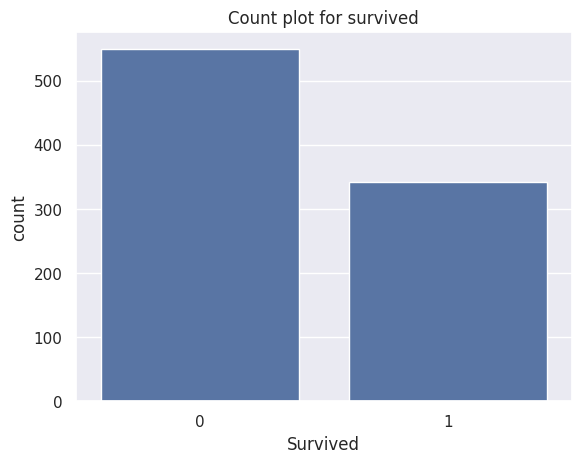

In [335]:
sns.countplot(x='Survived', data=titanic_data).set_title('Count plot for survived') # univariate

You can see that __more people died than survived.__ To know the exact count:

- Using groupby

In [336]:
titanic_data.head(1)

PassengerId  Survived  Pclass   Age  Fare Embarked  Ticket_Pass_Count  \
0            1         0       3  22.0  7.25        S                  1   

   FarePerPass GenderClass  FamilySize  
0         7.25        male           2

In [337]:
titanic_data.groupby(['Survived'])['Fare'].median() #5 --2 and 3 d

Survived
0    10.5
1    26.0
Name: Fare, dtype: float64

Notice that __455__ people __died__ and only __319 survived.__

<a id=section402></a>

### 4.2 Who is more likely to survive, Male or Female?

First of all looking at how __Age is varying with gender.__

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'Age Distribution using FacetGrid')

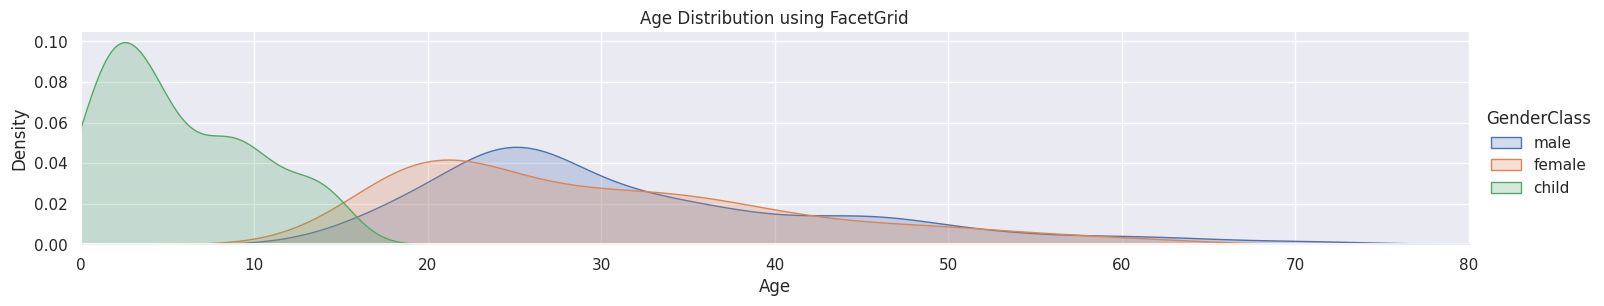

In [338]:

as_fig=sns.FacetGrid(titanic_data,hue='GenderClass', aspect=5)
as_fig.map(sns.kdeplot,'Age', shade=True)
oldest = titanic_data['Age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('Age Distribution using FacetGrid')


- In titanic RMS __child__ of Age __3-8__ yrs are in majority.
- Maximum __males and females__ are of Age __25-35__ yrs.

Using groupby

In [339]:
titanic_data.groupby(['Survived','GenderClass','Pclass'])['Survived'].value_counts()

Survived  GenderClass  Pclass
0         child        1           1
                       3          32
          female       1           2
                       2           6
                       3          58
          male         1          77
                       2          91
                       3         282
1         child        1           4
                       2          21
                       3          22
          female       1          90
                       2          60
                       3          59
          male         1          42
                       2           6
                       3          38
Name: count, dtype: int64

From the above you can see that its __difficult__ to absorb information quickly by looking at __numbers.__ Therefore we will make variety of plots to get clear vision of the scenario.

- Using factorplot

Text(0.5, 1.0, 'Factor plot for male female and child')

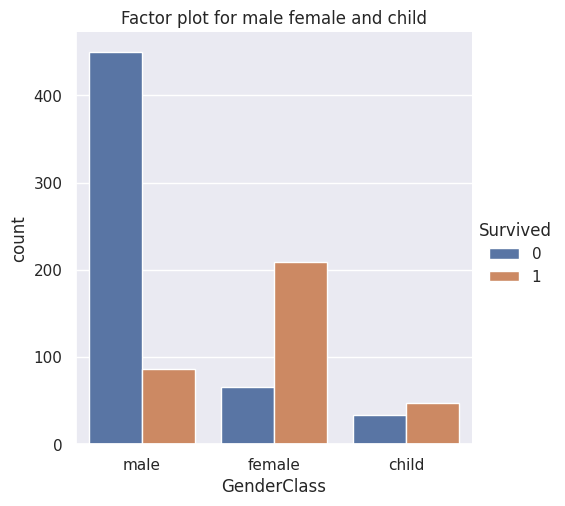

In [340]:
sns.catplot(x='GenderClass', hue='Survived', kind= 'count', data=titanic_data)
plt.title('Factor plot for male female and child')

In [341]:
titanic_data[titanic_data.GenderClass == 'female']['Survived'].count() # Total Female

np.int64(275)

In [342]:
titanic_data[titanic_data.GenderClass == 'female']['Survived'].sum()# Total Female that survived

np.int64(209)

- Majority of __males died__.
- __Females__ have high probability to __survive.__

To know the exact %

In [343]:
print("% of women survived: ", titanic_data[titanic_data.GenderClass == 'female']['Survived'].sum()/ titanic_data[titanic_data.GenderClass == 'female']['Survived'].count()*100)
print("% of male survived: ", titanic_data[titanic_data.GenderClass == 'male']['Survived'].sum()/ titanic_data[titanic_data.GenderClass == 'male']['Survived'].count()*100)
print("% of children survived: ", titanic_data[titanic_data.GenderClass == 'child']['Survived'].sum()/ titanic_data[titanic_data.GenderClass == 'child']['Survived'].count()*100)

% of women survived:  76.0
% of male survived:  16.044776119402986
% of children survived:  58.75


- Using pie plot

Text(0.5, 1.0, 'Survived (child)')

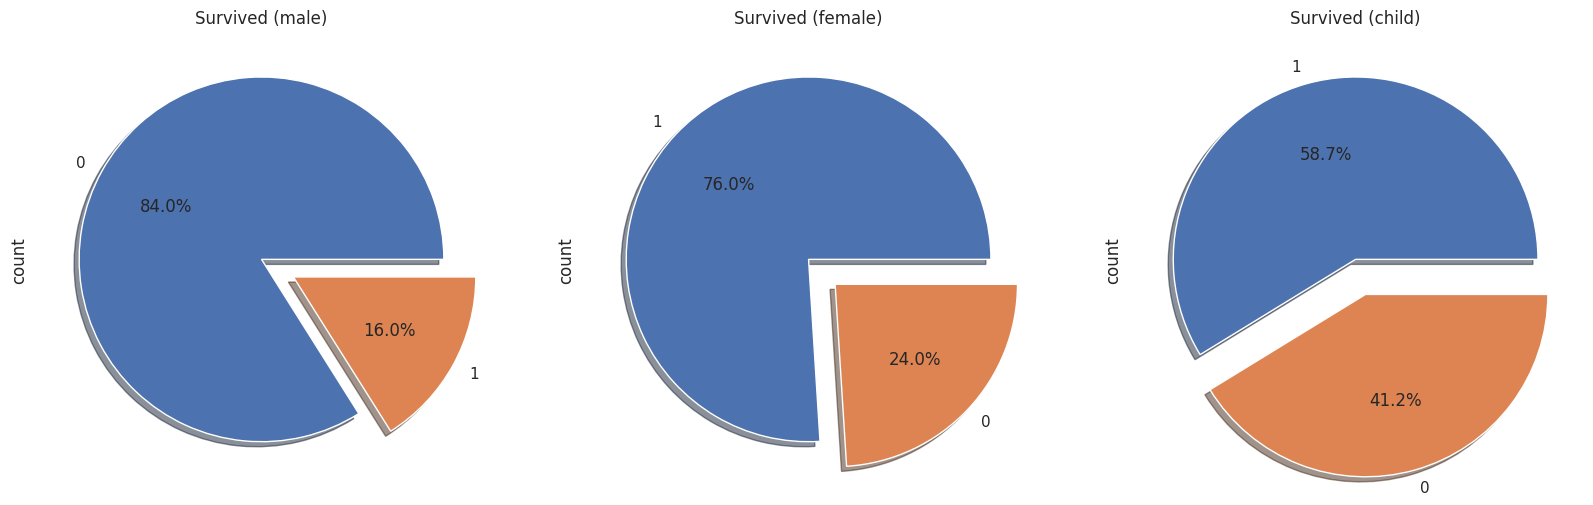

In [344]:
f,ax = plt.subplots(1,3,figsize=(20,7))
titanic_data['Survived'][titanic_data['GenderClass']=='male'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[0], shadow=True)
titanic_data['Survived'][titanic_data['GenderClass']=='female'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[1], shadow=True)
titanic_data['Survived'][titanic_data['GenderClass']=='child'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', ax=ax[2], shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
ax[2].set_title('Survived (child)')

From the above pie plot you can see how survival depends on whether the passenger is a child, male or female.
- __76% of females__ survived.
- __57% of children__ also survived.
- Only __16% of males__ survived.

In [345]:
titanic_data['Survived'][titanic_data['GenderClass']=='male'].value_counts()

Survived
0    450
1     86
Name: count, dtype: int64

In [346]:
titanic_data['Survived'][titanic_data['GenderClass']=='female'].value_counts()

Survived
1    209
0     66
Name: count, dtype: int64

<a id=section403></a>

### 4.4. What is the rate of survival of males, females and child on the basis of Passenger Class?

- Using mathematical function

In [347]:
print("% of Survuval in PClass=1: ", titanic_data[titanic_data.Pclass==1]['Survived'].sum()/ titanic_data[titanic_data.Pclass==1]['Survived'].count()*100)
print("% of Survuval in PClass=2: ", titanic_data[titanic_data.Pclass==2]['Survived'].sum()/ titanic_data[titanic_data.Pclass==2]['Survived'].count()*100)
print("% of Survuval in PClass=3: ", titanic_data[titanic_data.Pclass==3]['Survived'].sum()/ titanic_data[titanic_data.Pclass==3]['Survived'].count()*100)

% of Survuval in PClass=1:  62.96296296296296
% of Survuval in PClass=2:  47.28260869565217
% of Survuval in PClass=3:  24.236252545824847


- Using crosstab function

In [348]:
pd.crosstab([titanic_data.GenderClass, titanic_data.Survived], titanic_data.Pclass, margins=True).apply(lambda r: 100*r/len(titanic_data), axis=1).style.background_gradient(cmap='autumn_r')

In [349]:
titanic_data.groupby(['Pclass','GenderClass','Survived'])['Survived'].value_counts()

Pclass  GenderClass  Survived
1       child        0             1
                     1             4
        female       0             2
                     1            90
        male         0            77
                     1            42
2       child        1            21
        female       0             6
                     1            60
        male         0            91
                     1             6
3       child        0            32
                     1            22
        female       0            58
                     1            59
        male         0           282
                     1            38
Name: count, dtype: int64

You can see how the percentage of males, females and children survived are varying depending on the passenger class they are in. Also, its quiet difficult to develop quick insights by looking only at numbers. Therefore we will explore doing the same with the help of __plotting.__

- Using __violin plot__ to see the relationship between __Pclass and Survived__

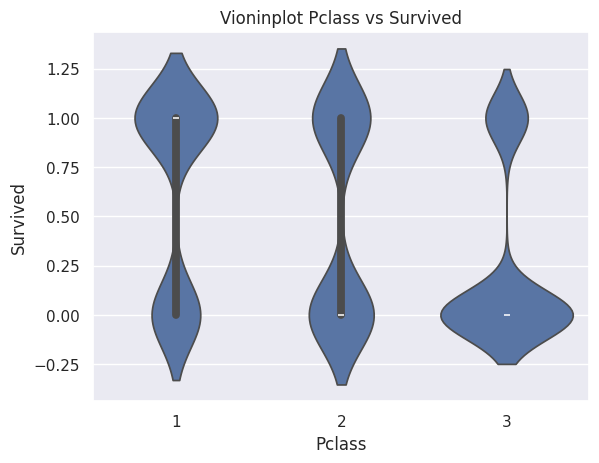

In [350]:
sns.violinplot(x='Pclass',y='Survived', data=titanic_data)
plt.title('Vioninplot Pclass vs Survived')
plt.show()

In [351]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Above is another beautiful way to see how the survival rate is varying with Passenger class.
- __Pclass 3__ have __more__ people who __died__, and for __Pclass 1 survival rate is more.__

 Drawing __factorplot__ to look at the __distribution of popluation__ with __Pclass and GenderClass.__

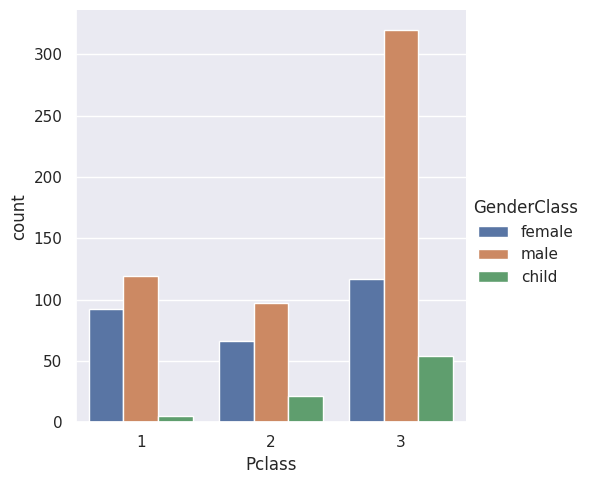

Text(0.5, 1.0, 'Factorplot with kind= "Count" for Pclass and GenderClass')

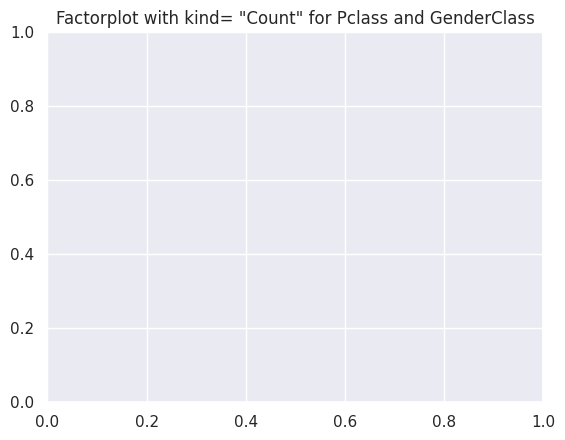

In [352]:
sns.catplot(x='Pclass', data=titanic_data, hue='GenderClass', kind='count')

plt.show()
plt.title('Factorplot with kind= "Count" for Pclass and GenderClass')

1. __Pclass 3__ have _maximum_ number of __males__
2. __Pclass 1__ have _minimum_ number of __children__.

- using factorplot to see the variation of __surviavl rate with Pclass and GenderClass.__

Text(0.5, 1.0, 'Factorplot for Survival rate variation with Pclass and GenderClass')

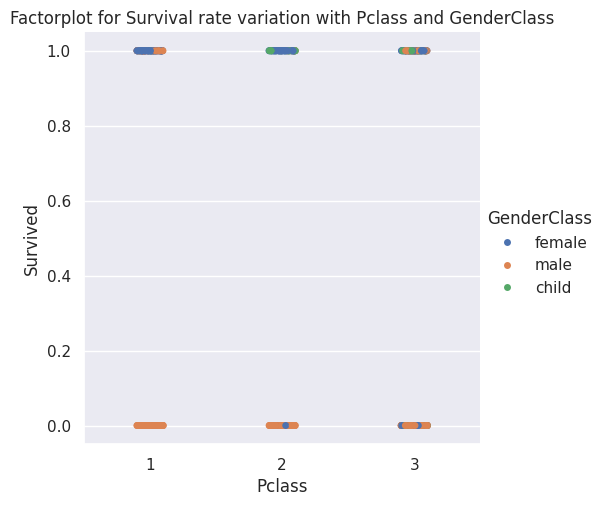

In [353]:
sns.catplot(x='Pclass',y='Survived', data=titanic_data, hue='GenderClass')
plt.title('Factorplot for Survival rate variation with Pclass and GenderClass')

The above graph shows:
1. the survival rate for male is very __low__ _irrespective of the class_ he belongs to.
2. And, the survival rate is _less_ for all the _3rd class passengers._
3. __Almost all women__ in Pclass __1 and 2 survived__ and __nearly all men__ in Pclass __2 and 3 died.__

<a id=section404></a>

### 4.4 What is the survival rate considering the Embarked variable?

- Using countplot

<Axes: xlabel='Embarked', ylabel='count'>

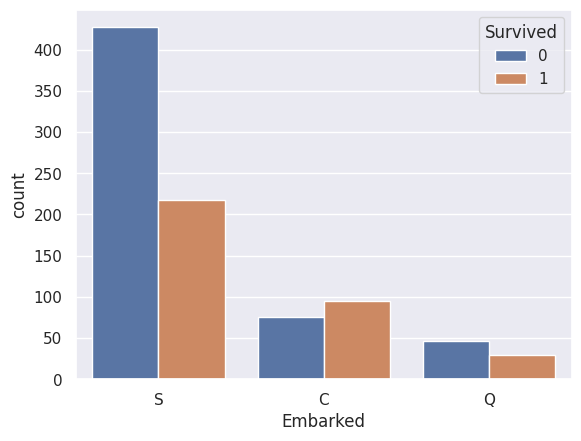

In [354]:
sns.countplot(x='Embarked', data=titanic_data, hue='Survived')

1. __Maximum___ number of people have __Southampton__ as port of embarkment.
2. Also observe people who boarded at _Cherbourg_, _more_ people _survived than died_, and this is reverse for Queenstown.

- Using __factorplot__ and __kind = 'point'__

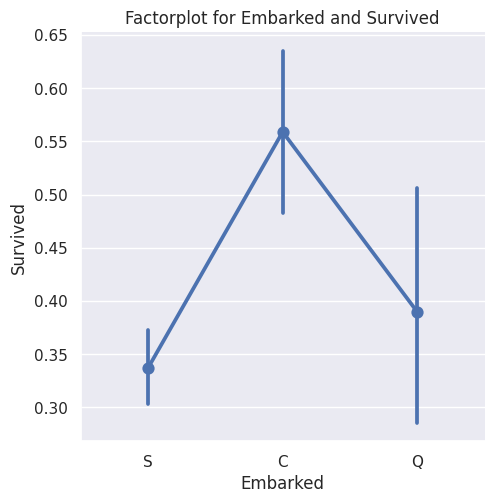

In [355]:
sns.catplot(x= 'Embarked',y= 'Survived', kind='point', data=titanic_data)
plt.title('Factorplot for Embarked and Survived')
plt.show()

<a id=section405></a>

### 4.5. Survival rate - Comparing Embarked and Sex.

- Distribution of _GenderClass_ with respect to _Port of Embarkment_ using __Countplot__.

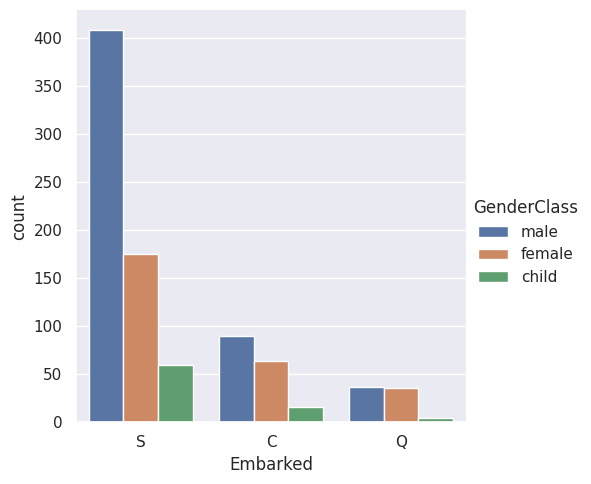

In [356]:
sns.catplot(x='Embarked', data=titanic_data, kind='count', hue='GenderClass')

Most of the people boarded from __S__, Also among all who boarded, __males__ constitutes the __majority__ of percentage.

- Using Factorplot to see variation of __survival rate with port of embarkment and GenderClass__

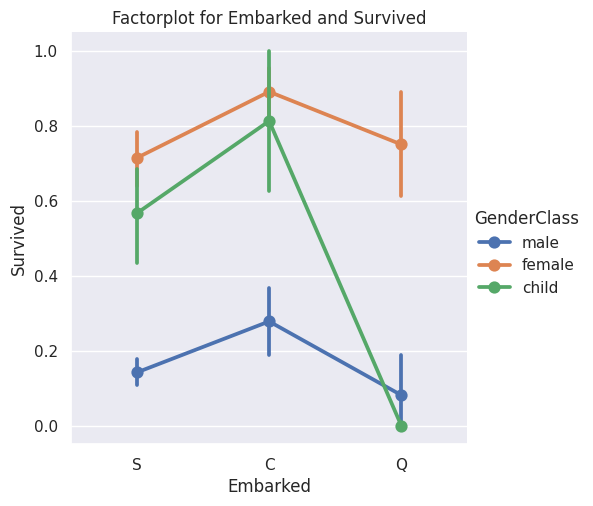

In [357]:
sns.catplot(x='Embarked',y='Survived', kind='point', hue='GenderClass', data=titanic_data)
plt.title('Factorplot for Embarked and Survived')
plt.show()

- Chances of survival of __females__ who boarded from __C__ is _highest_.
- Chances of survival of __males__ boarding from __Q__ is _lowest_

<a id=section406></a>

### 4.6 How survival rate vary with Embarked, Sex and Pclass.

Seeing relation between Pclass and Embarked.

Text(0.5, 1.0, 'Relation between Pclass and Embarked')

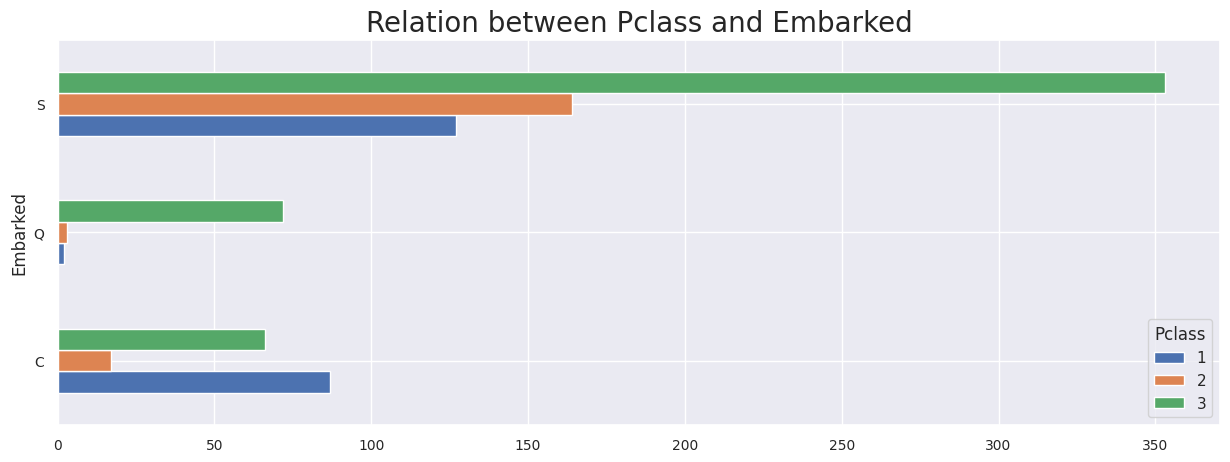

In [358]:
relation = pd.crosstab(titanic_data.Embarked, titanic_data.Pclass)
relation.plot.barh(figsize=(15,5))
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Relation between Pclass and Embarked', size=20)

Maximum people who boarded from __S__ belongs to __Pclass 3__.<br/>
Most of the passengers belonging to __Pclass 1__ boarded from __C and S__  


- Using Swarmplot

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Embarked', ylabel='Age'>

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


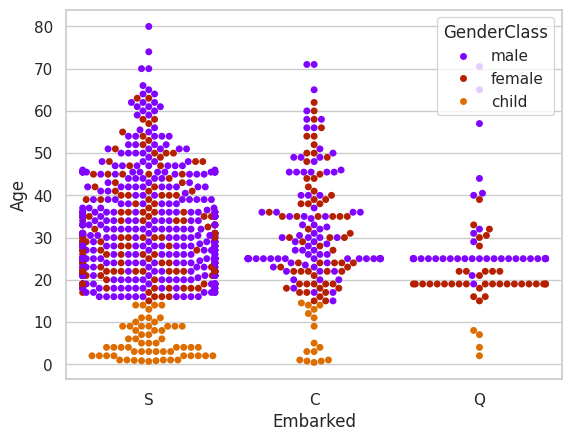

In [359]:
sns.set(style='whitegrid', palette='muted')
sns.swarmplot(x='Embarked',y='Age', hue='GenderClass', palette='gnuplot', data=titanic_data)

- Using factorplot with kind = 'point'

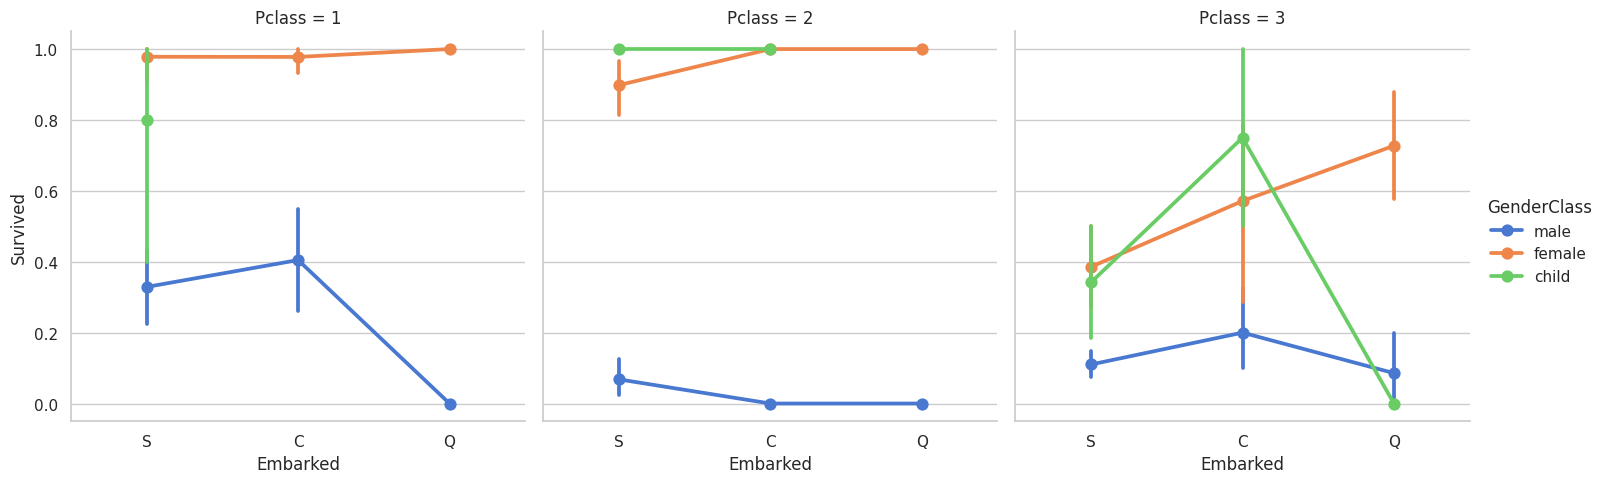

In [364]:
sns.catplot( x='Embarked',y='Survived', col='Pclass', hue='GenderClass', kind='point', data=titanic_data)
plt.show()

- Practically all _women_ of __Pclass 2__ that embarked in __C and Q survived__, also nearly all _women_ of __Pclass 1__ survived_.
- All _men_ of __Pclass 1 and 2__ embarked in __Q died__, survival rate for men in __Pclass 2 and 3__ is always __below 0.2__.
- For the remaining men in Pclass 1 that embarked in S and C, survival rate is approx. __0.4__

<a id=section407></a>

### 4.7 Segment age in bins with size 10.

In [365]:
for i in range(8,0,-1):
    titanic_data.loc[titanic_data['Age']<=i*10, 'Age_bin']=i # 80,70,60,50....

In [366]:
print(titanic_data[['Age','Age_bin']])

      Age  Age_bin
0    22.0      3.0
1    38.0      4.0
2    26.0      3.0
3    35.0      4.0
4    35.0      4.0
..    ...      ...
886  27.0      3.0
887  19.0      2.0
888  22.0      3.0
889  26.0      3.0
890  32.0      4.0

[891 rows x 2 columns]


<Axes: xlabel='Age_bin', ylabel='Survived'>

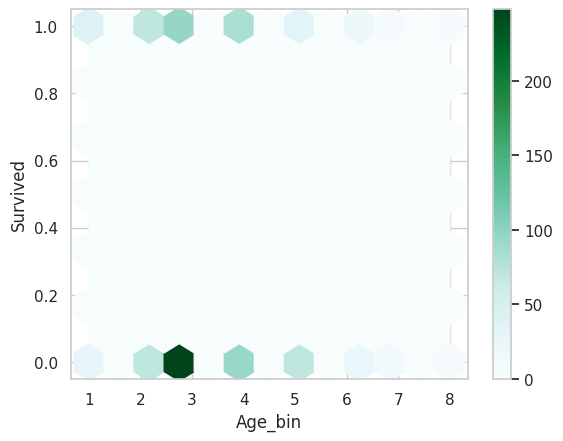

In [367]:
titanic_data.plot.hexbin(x='Age_bin', y='Survived', gridsize=12, legend=True)

Comparing count of those who survived and died with respect to the Age_bin they are in.
- __Age_bin 1__: As you can see hexagon for Survived( 1.0 ) is darker than Died(0.0), means __more children survived than died__.
- __Age_bin 3__: __More died than survived__, Also count of survived is highest among all age bins ( see horizontaly along Survived = 1.0 ) , means maximum people who boarded Titanic were from this age group.
- __Age_bin >4__: More people died than survived.

In [ ]:
sns.barplot(x='Age_bin',y='Survived', hue='Pclass', data=titanic_data)
plt.show()

- Calculating number of people of Age_bin = 1 and 8 from each Pclass.

In [ ]:
titanic_data[(titanic_data.Age_bin==1)]['Pclass'].value_counts()

In [ ]:
titanic_data[(titanic_data.Age_bin==8)]['Age'].value_counts()

In [ ]:
titanic_data[(titanic_data.Age_bin==1)&(titanic_data.Pclass==1)]['Survived']

In [ ]:
titanic_data[(titanic_data.Age_bin==8)]['Pclass'].value_counts()

In [ ]:
titanic_data[(titanic_data.Age_bin==8)& (titanic_data.Pclass==1)]['Survived'].value_counts()

In [ ]:
titanic_data[(titanic_data.Age_bin==8)& (titanic_data.Pclass==3)]['Survived'].value_counts()

- Among children of __age 0-10 yrs__ we dont have enough data points(3) in Pclass 1, therefore __discarding it__ (blue line of Age_bin 1)<br/>
- Also number of passengers belonging to age group __70-80 yrs__, is very less, therefore __ignoring them.__<br/>
- In __each Pclass__, we can see that the probability of survivying of __small children(Age = 0-10 yrs)__ is _higher_ than rest age group.<br/>
- In every Age_bin(ignoring Pclass 1 of first, and last Age_bin), __survival probability is highest for Pclass 1 and lowest for Pclass 3.__

In [ ]:
sns.factorplot('Age_bin', 'Survived',kind='point',data=titanic_data)
plt.show()

In [ ]:
sns.factorplot('Age_bin', 'Survived',kind='point',hue='GenderClass',data=titanic_data)
plt.show()

Its clear from the above graph that among people of all the ages, __females__ in general have __higher probability of survival than males__.

In [ ]:
sns.factorplot('Age_bin','Survived', col='Pclass', row='GenderClass',kind='point',data=titanic_data)
plt.show()

From the factor plot:<br/>

- In general for males, as __Pclass increases, survival probability decreases.__
- For the rest of the females, as _Pclass increases_, _survival probability decreases._<br/>
- You can also see survival rate within each Pclass for males and females.

<a id=section408></a>

### 4.8 Analysing survival rate with FamilySize.

- Using __factorplot__ to know the survival rate on the basis of __FamilySize__.

In [ ]:
ax= sns.factorplot(x='FamilySize', y='Survived',data=titanic_data, kind='violin', aspect=1.5, size=6, palette='Greens')
ax.set(ylabel="Percent of Passengers")
plt.title('Survival by Total Family Size')

As __size of family increases__ its chances of survival also __increases__.

<a id=section409></a>

### 4.9 Segment fare in bins of size 12.

- Using Distplot to see the distribution of __Fare__.

In [ ]:
sns.distplot(titanic_data['Fare'], color='g')
plt.title('Distribution of Fare')
plt.show()

We have seen that __'Fare'__ mostly varies between __10 and 90.__ We will use this information to create bins.

- Creating a new column named __'Fare_bin'__ based on 12 interval ranges in 'Fare' as __12 bins.__

In [378]:
for i in range(11,0,-1):
    titanic_data.loc[titanic_data['Fare']<=i*12, 'Fare_bin']=i #1,


In [381]:
titanic_data[['Fare','Fare_bin']].groupby('Fare_bin')['Fare'].mean()

Fare_bin
1.0       8.167262
2.0      16.026243
3.0      28.502722
4.0      41.149867
5.0      53.983336
6.0      67.491250
7.0      78.619094
8.0      89.758985
9.0     106.425000
10.0    190.193951
Name: Fare, dtype: float64

In [382]:
titanic_data[['Fare','Fare_bin']].groupby('Fare_bin')['Fare'].count()

Fare_bin
1.0     363
2.0     181
3.0     153
4.0      30
5.0      42
6.0      20
7.0      36
8.0      13
9.0       2
10.0     51
Name: Fare, dtype: int64

/tmp/ipython-input-3354474531.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic_data['Fare_bin'], color='g')


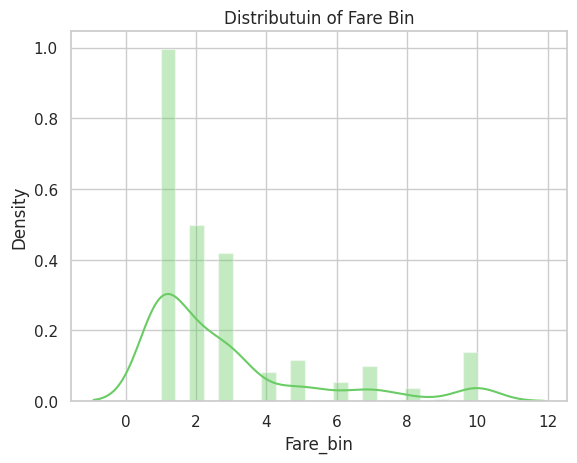

In [383]:
sns.distplot(titanic_data['Fare_bin'], color='g')
plt.title('Distributuin of Fare Bin')
plt.show()

In [ ]:
titanic_data['Fare'].mean()
titanic_data['Fare'].median()

- Using __barrplot__ to plot the relationship between __survival rate and Fare_bin and Pclass.__

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x='Fare_bin', y='Survived', hue='Pclass', data=titanic_data, ax=ax)
plt.show()

- As __fare increases, survival chances also increases__.
- Also __Pclass 1__ (blue color) have __more chances to survive__ compared to other Pclass.

<a id=section410></a>

### 4.10 Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'

Text(0.5, 1.0, 'Pair Plot')

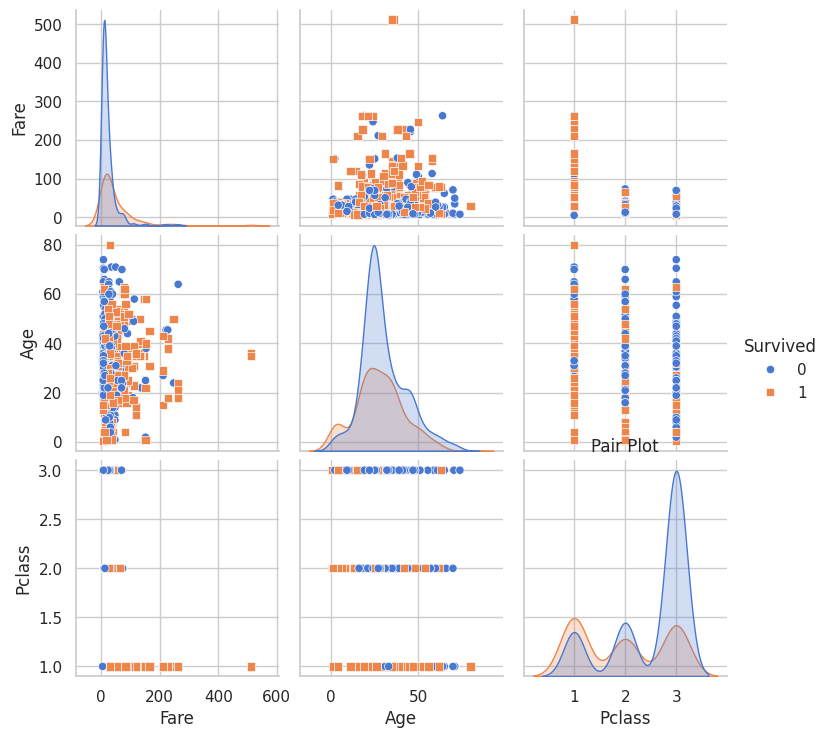

In [384]:
sns.pairplot(titanic_data[['Fare','Age','Pclass','Survived']],vars=['Fare','Age','Pclass'], hue='Survived', dropna=True, markers=['o','s'])
plt.title('Pair Plot')

Observing the diagonal elements,
- More people of Pclass 1 survived than died (First peak of red is higher than blue)
- More people of Pclass 3 died than survived (Third peak of blue is higher than red)
- More people of age group 20-40 died than survived.
- Most of the people paying less fare died.

<a id=section411></a>

### 4.11 Establish coorelation between all the features using heatmap.

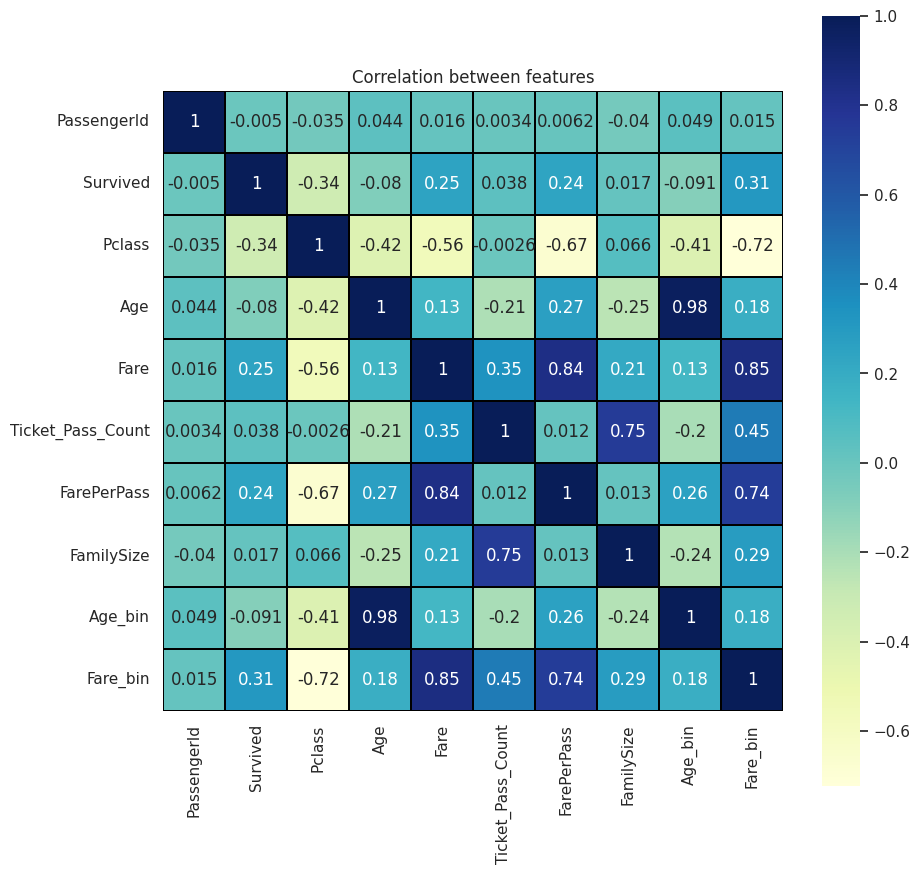

In [386]:
# Drop non-numeric columns before calculating correlation
numeric_titanic_data = titanic_data.select_dtypes(include=np.number)
corr = numeric_titanic_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, linewidth=0.01, square=True, annot=True, cmap='YlGnBu', linecolor='black')
plt.title('Correlation between features')
plt.show()

- __Age and Pclass are negatively corelated with Survived.__
- FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
- __Fare and FamilySize__ are __positively coorelated with Survived.__
- With high corelation we face __redundancy__ issues.

<a id=section412></a>

### 4.12 Hypothesis: Women and children are more likely to survive

On studying Questionnaire 4.1, 4.2 and 4.3 we observed that an overwhelming percentage of __women & children__ have survived the titanic clash.
- __76%__ of __females__ survived.
- __57%__ of __children__ also survived.
- Only __16%__ of __males__ survived.<br/>
Also the survival rate for male is very low irrespective of the _class_ he belongs to and the _survival rate is less_ for all the _3rd class passengers._ Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died.

<a id=section5></a>

## 5. Conclusion

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _missing_ values and irregualities present in the data. We also learnt how to _create new features_ which will in turn help us to better predict the survival.
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like _Age, Embarked, Fare, SibSp and Parch_ on the rate of survival.
- The most important inference drawn from all this analysis is, we get to know what are the __features on which survival is highly positively and negatively coorelated with.__
- This analysis will help us to choose which __machine learning model__ we can apply to predict survival of test dataset.